### Exploring Correlations in Hospital Location and Census Parameters

#### Questions to Investigate
* What cities are the furthest away from a hospital?
* What counties in Georgia have the highest and lowest number of hospital beds available per thousand people?
* Are there correlations between population, median income, and the number of hospital beds?

#### Approach
In order approach these questions I used a custom data set created by my group that includes information about hospitals, 
and cities. For exploratory purposes, I created scatter plots of major variables to search for any easily detectable correlations. Then I used gmaps to create geomap. To do this, I created a dataframe with relevant data from hospitals, such as their geographic coordinates, county, and number of acute care beds. I also created dataframe with data for cities. This one includes geographic coordinates, county, population, and median income. Then, I processsed these two dataframes to evaluate visually whether there were any notable patterns in the distribution of hospitals across Georgia and other factors like the number of acute care beds per capita, population, and city level median income. 


#### Take Aways



In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from geopy.distance import distance


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# configure gmaps
import gmaps
from config import g_key 
gmaps.configure(api_key=g_key)


In [3]:
# import primary data set
data = pd.read_csv('Outputs/Finalized_Data.csv')

In [5]:
# Clean Up
data = data.rename(columns = {'City County':"County", "Hospital City":"City"})

In [6]:
# data.loc[data['City']=='Atlanta']
data

,Hospital name,City,Hospital County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longitude,Street Address,State,Hospital Zip Code,Full Address,City Zip Code,City Latitude,City Longitude,County,Population,Median Income
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30703.0,34.479066,-84.762161,Gordon County,40820,24110
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,Los Angeles County,33460,24457
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31758.0,30.868187,-83.927785,Thomas County,34781,24350
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,Wood County,9062,24644
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,Mitchell County,8419,21584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,Zebulon,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30295.0,33.101705,-84.312520,Wake County,4352,31654
538,Emory Johns Creek Hospital,Alpharetta,Fulton County,118,2007,Emory,NaN,ChIJ8wevZy-Z9YgR5mpDmsMDM48,34.066497,-84.176237,6325 Hospital Parkway,Georgia,30097.0,"6325 Hospital Pkwy, Johns Creek, GA 30097, USA",30005.0,34.080035,-84.219290,Fulton County,189192,51690
539,Southeast Georgia Health System Camden,Saint Marys,Camden County,40,NaN,SGHS,NaN,ChIJU6IsZ5cE5YgRaTwbgslwgUw,30.780917,-81.615147,2000 Dan Proctor Drive,Georgia,31558.0,"2000 Dan Proctor Dr, St Marys, GA 31558, USA",31558.0,30.761081,-81.569120,Jasper County,21307,29862
540,WellStar West Georgia Medical Center,Lagrange,Troup County,542,1937,WellStar,NaN,ChIJ40ZJ5vtWi4gRK6PnDb-BAPU,33.030940,-85.058637,1514 Vernon Road,Georgia,30240.0,"1514 Vernon Rd, LaGrange, GA 30240, USA",30241.0,33.036715,-84.988950,Troup County,54380,23961


In [7]:
# Create extract for exploratory scatter plots

newdata = data[['City','Population','Median Income','Acute Care Beds']]
cityagg = data.groupby('City')
newdata = newdata.merge(pd.DataFrame(cityagg.nunique()['Hospital name']), on = 'City', how = 'left').rename(columns = {'Hospital name':'HospitalCount'})
newdata['BedsPer1000'] = 1000*newdata['Acute Care Beds']/newdata['Population']

# Display extract sample for a known city
newdata.loc[newdata['City']== 'Atlanta']

,City,Population,Median Income,Acute Care Beds,HospitalCount,BedsPer1000
15,Atlanta,988350,37006,0,13,0.000000
16,Atlanta,988350,37006,569,13,0.575707
17,Atlanta,988350,37006,812,13,0.821571
18,Atlanta,988350,37006,0,13,0.000000
19,Atlanta,988350,37006,0,13,0.000000
20,Atlanta,988350,37006,276,13,0.279253
21,Atlanta,988350,37006,511,13,0.517023
22,Atlanta,988350,37006,961,13,0.972328
23,Atlanta,988350,37006,537,13,0.543330
24,Atlanta,988350,37006,498,13,0.503870


The R-Squared value is 0.11063925152698342. 
The p-value is 1.813081407223132e-15.


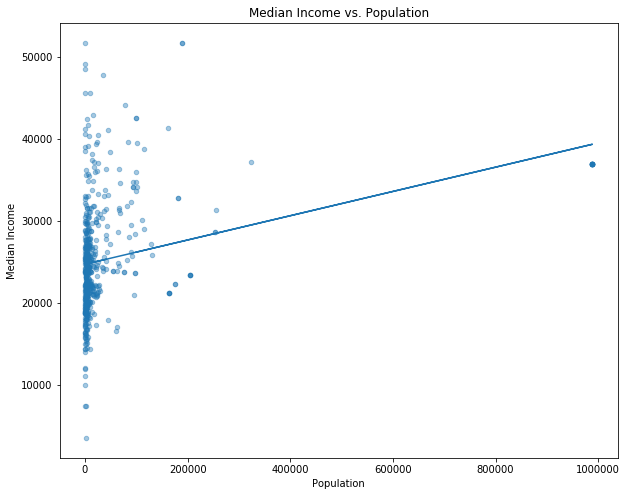

In [11]:
# Creating scatter plot of Median income against population

pltdata =  newdata.loc[newdata['Median Income'] > 0]
pltdata.plot(kind = 'scatter', x = 'Population',y = 'Median Income', figsize = (10,8),alpha = .4, title = 'Median Income vs. Population')
(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['Median Income'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

print(f'''The R-Squared value is {r**2}. 
The p-value is {p}.''')

The R-Squared value is 0.00013094737197328748. 
The p-value is 0.7903916146048999.


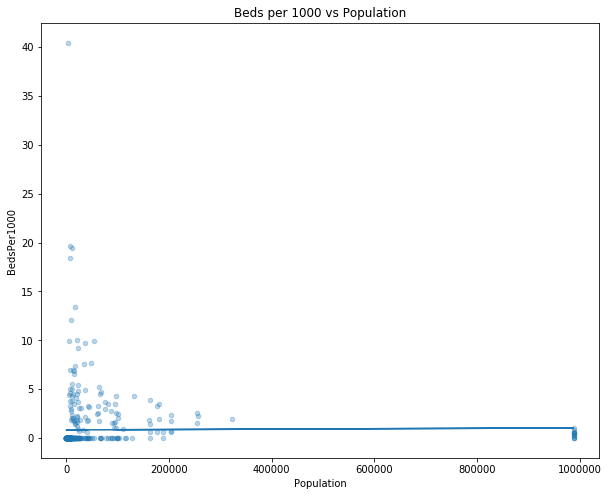

In [14]:
# Creating scatter plot of beds per thousand against population

pltdata.plot(kind = 'scatter', x = 'Population',y = 'BedsPer1000', figsize = (10,8), alpha = .3, title = 'Beds per 1000 vs Population')

(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['BedsPer1000'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

print(f'''The R-Squared value is {r**2}. 
The p-value is {p}.''')

The R-Squared value is 0.004295734749880285. 
The p-value is 0.12751143575223833.


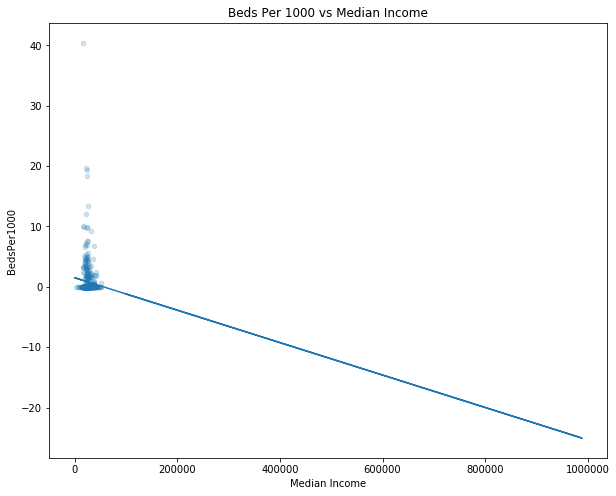

In [13]:
# Creating scatter plot of beds per 1000 against  Median income 

pltdata.plot(kind = 'scatter', x = 'Median Income',y = 'BedsPer1000', figsize = (10,8), alpha = .2, title = 'Beds Per 1000 vs Median Income')


(m,b,r,p,err) = st.linregress(x=pltdata['Median Income'],y = pltdata['BedsPer1000'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

print(f'''The R-Squared value is {r**2}. 
The p-value is {p}.''')

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


The R-Squared value is 0.3581170606710162. 
The p-value is 5.890875835628088e-54.


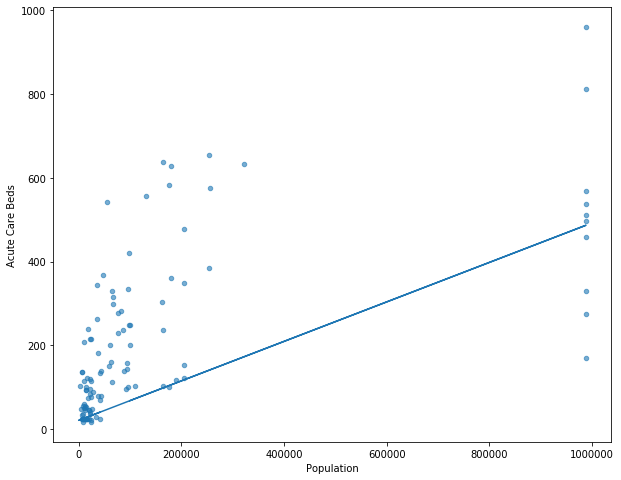

In [18]:
# Creating scatter total beds against  Median income 

pltdata['BedsFilter'] = pltdata['Acute Care Beds'] == 0 # = pltdata['Acute Care Beds'].astype(int)
bedsdata = pltdata.loc[pltdata['BedsFilter']== False]
bedsdata['Acute Care Beds'] = bedsdata['Acute Care Beds'].astype(float)
bedsdata.plot(kind = 'scatter', x = 'Population',y = 'Acute Care Beds', figsize = (10,8), alpha = .6)



(m,b,r,p,err) = st.linregress(x=pltdata['Population'],y = pltdata['Acute Care Beds'])
regress_values =  m*pltdata['Population']+ b
plt.plot(pltdata['Population'],regress_values)

print(f'''The R-Squared value is {r**2}. 
The p-value is {p}.''')

In [16]:
# Creating dataframe of county level data

county_agg = data.groupby('County')
county_sum = county_agg.sum()
county_data = county_sum[['Acute Care Beds', 'Population']]
county_data['BedsPer1000'] = 1000*county_data['Acute Care Beds']/county_data['Population']
county_data

C:\Users\msflo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Acute Care Beds,Population,BedsPer1000
County,,,
Abbeville County,0,4563,0.000000
Alachua County,557,131139,4.247402
Alameda County,0,23591,0.000000
Albany County,668,195454,3.417684
Albemarle County,17,9071,1.874104
...,...,...,...
Wood County,25,9062,2.758773
Worcester County,0,1715,0.000000
Worth County,25,12138,2.059647


The R-Squared value is 6.569891793580472e-06. 
The p-value is 0.9652138121465629.


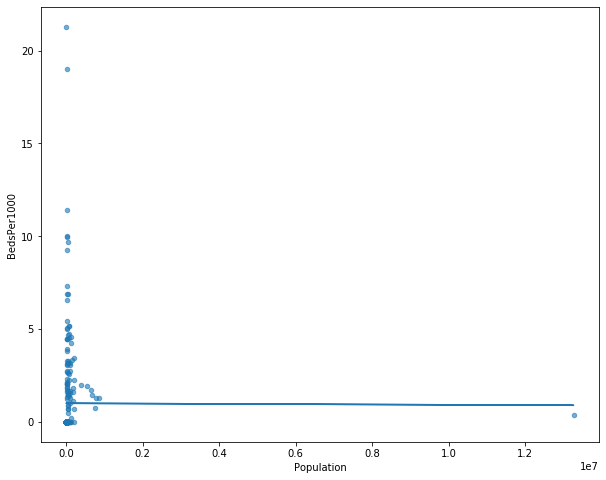

In [19]:
# Creating scatter plot of beds per 1000 vs. population at county level

county_data.plot(kind = 'scatter', x = 'Population',y = 'BedsPer1000', figsize = (10,8), alpha = .6)


(m,b,r,p,err) = st.linregress(x=county_data['Population'],y = county_data['BedsPer1000'])
regress_values =  m*county_data['Population']+ b
plt.plot(county_data['Population'],regress_values)

print(f'''The R-Squared value is {r**2}. 
The p-value is {p}.''')


In [22]:
# Creates geodata extract of city data 
city_geodata = data[['City','County',  'City Latitude', 'City Longitude', 'Population', 'Median Income', 'Acute Care Beds']]
city_geodata

,City,County,City Latitude,City Longitude,Population,Median Income,Acute Care Beds
0,Calhoun,Gordon County,34.479066,-84.762161,40820,24110,69
1,Chatsworth,Los Angeles County,34.753129,-84.775020,33460,24457,29
2,Thomasville,Thomas County,30.868187,-83.927785,34781,24350,264
3,Quitman,Wood County,30.783639,-83.553430,9062,24644,25
4,Camilla,Mitchell County,31.209854,-84.236670,8419,21584,25
...,...,...,...,...,...,...,...
537,Zebulon,Wake County,33.101705,-84.312520,4352,31654,0
538,Alpharetta,Fulton County,34.080035,-84.219290,189192,51690,118
539,Saint Marys,Jasper County,30.761081,-81.569120,21307,29862,40
540,Lagrange,Troup County,33.036715,-84.988950,54380,23961,542


In [25]:
# creates geodata extract of hospitals 
hospital_geodata = data[['Hospital name','Hospital Latitude', 'Hospital Longitude']]
hospital_geodata = hospital_geodata.loc[hospital_geodata['Hospital name'].isna()!=True]
hospital_geodata

,Hospital name,Hospital Latitude,Hospital Longitude
0,AdventHealth Gordon,34.510205,-84.926304
1,AdventHealth Murray,34.779956,-84.783038
2,Archbold Memorial Hospital,30.825169,-83.972128
3,Archbold - Brooks County Hospital,30.795039,-83.559146
4,Archbold - Mitchell County Hospital,31.229773,-84.205317
...,...,...,...
118,Habersham Medical Center,34.581044,-83.537089
538,Emory Johns Creek Hospital,34.066497,-84.176237
539,Southeast Georgia Health System Camden,30.780917,-81.615147
540,WellStar West Georgia Medical Center,33.030940,-85.058637


## Geospatial Analysis!  
##### Using GeoPy module and gmaps

In [24]:
# Initializes lists for geospatial analysis
fives = []
tens = []
twenties = []
fifties = []
hundreds = []
nearesthospitaldistance = []

# does geospatial analysis for each city
for city in city_geodata.iterrows():
    
    # initialises counters for city geospatial analysis
    fivemiles = 0 # number of hospitals within five miles
    tenmiles = 0 # number of hospitals within ten miles
    twentymiles = 0 # number of hospitals within twenty miles
    fiftymiles = 0 # number of hospitals within fifty miles
    hundredmiles = 0
    
    # grabs city coordinate 
    city_coord = city[1]['City Latitude'],city[1]['City Longitude']
    
    # initializes distance list 
    distances = []
    
    # iterates and calculates distance between city and each hospital and increments counters
    for row in hospital_geodata.iterrows():
        
        if pd.isna(city_coord[0]) == True or pd.isna(city_coord[1]) == True:
            print('Skipping due to Null city Coordinates...')
        else:
            hospital_coord = row[1]['Hospital Latitude'],row[1]['Hospital Longitude']

            d = distance(city_coord , hospital_coord ).miles
            distances.append(d)
            
            if d <= 100:
                hundredmiles = hundredmiles + 1
            if d <= 50:
                fiftymiles = fiftymiles + 1
            if d <= 20:
                twentymiles = twentymiles + 1
            if d <= 10:
                tenmiles = tenmiles + 1
            if d <= 5:
                fivemiles = fivemiles + 1

    
    # appends values
    fives.append(fivemiles)
    tens.append(tenmiles)
    twenties.append(twentymiles)
    fifties.append(fiftymiles)
    hundreds.append(hundredmiles)
    nearesthospitaldistance.append(min(distances))



In [59]:
# Adds calculated fields to city geodata dataframe

city_geodata['WithinFiveMiles'] = fives
city_geodata['WithinTenMiles'] = tens
city_geodata['WithinTwentyMiles'] = twenties
city_geodata['WithinFiftyMiles'] = fifties
city_geodata['WithinHundredMiles'] = hundreds
city_geodata['DistanceToNearestHospital'] = nearesthospitaldistance

city_geodata['BedsPer1000'] = 1000*city_geodata['Acute Care Beds']/city_geodata['Population']

In [38]:
# city_geodata.to_csv('./Outputs/HospitalMiles.csv')

#### most populous cities with a distance of over 20 miles from nearest hospital

In [48]:
# creates data frame of top ten most populous cities with a distance of over 20 miles from nearest hospital

toofar_list = city_geodata.loc[city_geodata['DistanceToNearestHospital']>=20]
toofar_list['DistanceToNearestHospital'] = toofar_list['DistanceToNearestHospital'].round(decimals=2)
toofar_list.sort_values('Population', ascending = False)[['City','County','Population','DistanceToNearestHospital']].head(10)

,City,County,Population,DistanceToNearestHospital
248,Folkston,Charlton County,10970,24.81
128,Alma,Crawford County,9914,23.10
492,Townsend,Middlesex County,7900,23.77
494,Trion,Chattooga County,7330,20.37
534,Wrightsville,New Hanover County,7046,20.33
527,Winterville,Pitt County,6601,21.61
169,Buena Vista,Chaffee County,5487,23.21
320,Louisville,Jefferson County,5386,24.76
515,Waynesville,Haywood County,4839,20.59
124,Alamo,Tulsa County,4766,22.67


R-Squared is 0.004295734749880285. The p-value is 0.12751143575223833


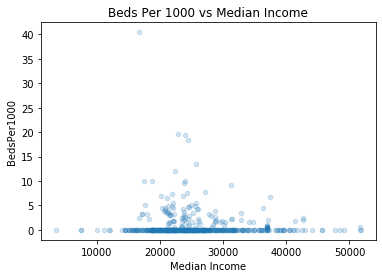

In [58]:
city_geodata.plot(kind = 'scatter', x = 'Median Income', y = 'BedsPer1000', alpha = .2,title = 'Beds Per 1000 vs Median Income')
(slope,intercept,r,p,err) = st.linregress(x = city_geodata['Median Income'], y = city_geodata['BedsPer1000'])
regvalues = slope*city_geodata['Median Income']+intercept
print(f'R-Squared is {r**2}. The p-value is {p}')




### Geomapping - Distance From Nearest Hospital

In [60]:
#Plotting hospitals as the markers
hospitallist= hospital_geodata["Hospital name"].tolist()
fig = gmaps.figure()
locations = hospital_geodata[['Hospital Latitude', 'Hospital Longitude']]
locations2 = city_geodata[['City Latitude', 'City Longitude']]
weights = city_geodata['DistanceToNearestHospital'].tolist()
#Creating heat layer
fig = gmaps.figure()
markers = gmaps.symbol_layer(locations,fill_color='blue',stroke_color='blue',fill_opacity = .2,stroke_opacity = .3,
    scale = 2,
    info_box_content=[f"Name: {city}" for city in hospitallist])
fig.add_layer(markers)

gmaps.configure(api_key=g_key)
hdistance = gmaps.WeightedHeatmap(locations=locations2,weights=weights,dissipation = True)
fig.add_layer(hdistance) # format to see map better
hdistance.max_intensity = max(weights)
hdistance.point_radius = 9


fig

### Geomapping - Hospitals & Beds Per 1000 Residents

In [62]:
#Plotting hospitals as the markers
hospitallist= hospital_geodata["Hospital name"].tolist()
fig = gmaps.figure()
locations = hospital_geodata[['Hospital Latitude', 'Hospital Longitude']]
locations2 = city_geodata[['City Latitude', 'City Longitude']]
weights = city_geodata['BedsPer1000'].tolist()
#Creating heat layer
fig = gmaps.figure()
markers = gmaps.symbol_layer(locations,fill_color='blue',stroke_color='blue',fill_opacity = .2,stroke_opacity = .3,
    scale = 2,
    info_box_content=[f"Name: {city}" for city in hospitallist])
fig.add_layer(markers)

hdistance = gmaps.WeightedHeatmap(locations=locations2,weights=weights,dissipation = False)
fig.add_layer(hdistance) 

# format to see map better
hdistance.max_intensity = max(weights)/2 # adjusting/compressing scale for better visibility
hdistance.point_radius = 9


fig

Figure(layout=FigureLayout(height='420px'))

#### Identifying Most Populous Towns With Nearest Hospital Over 20 Miles Away

In [54]:
city_geodata.sort_values('BedsPer1000',ascending = False)[['City','County','Population','Acute Care Beds', 'BedsPer1000']].head(10)

county_agg = city_geodata.groupby('County').sum()[['Population','Acute Care Beds']]
county_agg['BedsPer1000'] = 1000*county_agg['Acute Care Beds']/county_agg['Population']
county_agg['BedsPer1000'] = county_agg['BedsPer1000'].round(decimals=2)

chart = county_agg.sort_values('BedsPer1000', ascending = False)
chart.head(10)

,Population,Acute Care Beds,BedsPer1000
County,,,
Meriwether County,4887,104,21.28
Evans County,10987,209,19.02
Towns County,12007,137,11.41
Crisp County,21549,216,10.02
Gray County,4928,49,9.94
Ware County,35587,345,9.69
Paulding County,23326,216,9.26
Toombs County,16665,122,7.32
Thomas County,38328,264,6.89


#### Identifying Most Populous Counties With No Acute Care Beds 

In [55]:
chart.loc[chart['BedsPer1000']==0].sort_values(['Population'], ascending = False).head(10)

,Population,Acute Care Beds,BedsPer1000
County,,,
Henry County,194156,0,0.0
St. Louis County,114864,0,0.0
Ulster County,101721,0,0.0
Craighead County,88804,0,0.0
Clayton County,76499,0,0.0
Walton County,75267,0,0.0
Fayette County,47675,0,0.0
Columbia County,44065,0,0.0
Bryan County,39631,0,0.0


### Geomapping - Hospitals and Median Income

In [63]:
#Plotting hospitals as the markers
hospitallist= hospital_geodata["Hospital name"].tolist()
fig = gmaps.figure()
locations = hospital_geodata[['Hospital Latitude', 'Hospital Longitude']]
locations2 = city_geodata[['City Latitude', 'City Longitude']]
weights = city_geodata['Median Income'].tolist()

#Creating heat layer
fig = gmaps.figure()
markers = gmaps.symbol_layer(locations,fill_color='blue',stroke_color='blue',fill_opacity = .2,stroke_opacity = .3,
    scale = 2,
    info_box_content=[f"Name: {city}" for city in hospitallist])
fig.add_layer(markers)
hdistance = gmaps.WeightedHeatmap(locations=locations2,weights=weights,dissipation = False)
fig.add_layer(hdistance) 

# format to see map better
hdistance.max_intensity = max(weights)
hdistance.point_radius = 9


fig

Figure(layout=FigureLayout(height='420px'))

### Geomapping - Hospitals and Population

In [44]:
#Plotting hospitals as the markers, city + 
hospitallist= hospital_geodata["Hospital name"].tolist()
fig = gmaps.figure()
locations = hospital_geodata[['Hospital Latitude', 'Hospital Longitude']]
locations2 = city_geodata[['City Latitude', 'City Longitude']]
weights = city_geodata['Population'].tolist()

#Creating heat layer
fig = gmaps.figure()
markers = gmaps.symbol_layer(locations,fill_color='blue',stroke_color='blue',fill_opacity = .2,stroke_opacity = .3,
    scale = 2,
    info_box_content=[f"Name: {city}" for city in hospitallist])
fig.add_layer(markers)
hdistance = gmaps.WeightedHeatmap(locations=locations2,weights=weights,dissipation = False)
fig.add_layer(hdistance) 

# format to see map better
hdistance.max_intensity = max(weights)/8 # adusting/compressing scale for better visibility. Try other numbers!
hdistance.point_radius = 9


fig

Figure(layout=FigureLayout(height='420px'))